# Sect 06:  Visualizations

- onl01-dtsc-pt-041320
- 05/06/20


## Learning Objectives

- Matplotlib is the backbone of plotting in python and used by pandas,seaborn,etc.
    - [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
    - [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
    - ['Pandas Visualization docs']('https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html')

-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
    
    - **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>


    
- Seaborn and Pandas plots can be updated with matplotlib commands's OOP type of commands (`ax.set_title()`)

## Questions/Comments?

### From the Gdoc

___

# Intro to Matplotlib

##  Matplotlib Refs

- Matplotlib is the backbone of plotting in python and used by pandas,seaborn,etc.
    - [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
    - [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
    - ['Pandas Visualization docs']('https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html')



-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
    
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
    
    - **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>

- [My Blog Post on Making Customized Figures in seaborn](https://jirvingphd.github.io/harnessing_seaborn_subplots_for_eda)
    - This covers some concepts we didn't have time to cover, like ticklabel formatters.

### **Matplotlib Offical Documentation**

- [Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
- [Colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html )
- [Text](https://matplotlib.org/3.1.0/tutorials/text/text_intro.html )
- [Text Properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html)

## Matplotlib Anatomy / Structure

<center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_anatomy.png" width=400></center>

- Matplotlib Figures are composed of 3 different objects:
    - `Figure` is the largest bucket and contains everything else. It is like a picture frame without any actual images in it.
  - `Axes` are the actual plot / image inside of the Figure / frame. 
        - this is the same `ax` as in `fig, ax = plt.subplots()` and that is returned when you create a Pandas or Seaborn figure.
        - There is an 'Axes` for each subplot in the Figure
        - `Axes` contain information about the titles, labels, grid,background, they also contain an. See the figure below for the contents of `Axes`

        
- Inside Axes there is an `Axis` which is further divided into an `Axis.xaxis` and an `Axis.yaxis` that contain the ticks and the tick lables.
    <center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_Axes_layout2.png" width=500></center>
  

In [88]:
!pip install -U fsds
from fsds.imports import *

Requirement already up-to-date: fsds in /anaconda3/envs/learn-env/lib/python3.6/site-packages (0.2.8)


# Previously on...  *Section 05*

## Prior Activity: Project - Data Cleaning

- [Lesson](https://learn.co/tracks/module-1-data-science-career-2-1/intro-to-data-with-python-and-sql/section-05-data-cleaning-in-pandas/project-data-cleaning)

- [Solution](https://github.com/learn-co-students/dsc-data-cleaning-project-onl01-dtsc-pt-041320/tree/solution)

In [190]:
# !pip install -U fsds
from fsds.imports import *

In [191]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [192]:
heroes_df = fs.datasets.load_superhero_info(read_csv_kwds={'index_col':0})#pd.read_csv('heroes_information.csv',index_col=0)
powers_df = fs.datasets.load_superhero_powers()#pd.read_csv('super_hero_powers.csv')
display(heroes_df.head(),powers_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
heroes_df.drop_duplicates(inplace=True)
heroes_df[heroes_df.duplicated()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [195]:
heroes_df.drop_duplicates(subset=['name'],inplace=True)
heroes_df[heroes_df.duplicated(subset=['name'],keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [197]:
# heroes_df.loc[(heroes_df['Weight']<0)]#,(heroes_df['Weight']<0)]

In [198]:
str_cols = list(heroes_df.select_dtypes('object').columns)
str_cols

['name',
 'Gender',
 'Eye color',
 'Race',
 'Hair color',
 'Publisher',
 'Skin color',
 'Alignment']

In [199]:
# for col in str_cols:
#     display(heroes_df[col].value_counts(dropna=False))
#     print()

In [200]:
placeholders = ['-',-99.0]
heroes_df.replace(placeholders,np.nan, inplace=True)#.isna().sum()

num_cols = heroes_df.select_dtypes('number').columns
for col in num_cols:
    heroes_df[col] = heroes_df[col].fillna(heroes_df[col].median())
    

heroes_df.isna().sum()/len(heroes_df)*100

name           0.000000
Gender         3.916084
Eye color     23.076923
Race          41.958042
Hair color    23.216783
Height         0.000000
Publisher      2.097902
Skin color    90.069930
Alignment      0.979021
Weight         0.000000
dtype: float64

In [201]:
heroes_df.dropna(subset=['Alignment','Publisher'],inplace=True)
heroes_df.isna().sum()

name            0
Gender         25
Eye color     154
Race          293
Hair color    155
Height          0
Publisher       0
Skin color    625
Alignment       0
Weight          0
dtype: int64

In [202]:
res = heroes_df.isna().sum()#.apply()
res[res>0]#.index

Gender         25
Eye color     154
Race          293
Hair color    155
Skin color    625
dtype: int64

In [203]:
null_cols = res[res>0].index

null_cols

Index(['Gender', 'Eye color', 'Race', 'Hair color', 'Skin color'], dtype='object')

In [204]:
idx = heroes_df['Gender'].isna()
# heroes_df.loc[idx,'Gender'] = "missing"
heroes_df['Gender'].value_counts()

Male      475
Female    194
Name: Gender, dtype: int64

In [205]:
for col in null_cols:
    val_counts = heroes_df[col].value_counts(normalize=True)
    idx = heroes_df[col].isna()
    heroes_df.loc[idx,col] = heroes_df.loc[idx,col].apply(lambda x: np.random.choice(val_counts.index,
                                                           p=val_counts.values))

In [206]:
# heroes_df['Race'].value_counts(normalize=True)

In [207]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

### Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [210]:
# display(heroes_df.head(),powers_df.head())

In [211]:
pd.set_option('display.max_columns',0)

df = pd.merge(heroes_df, powers_df, left_on='name', right_on='hero_names')
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,silver,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,red,bad,441.0,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,silver,bad,81.0,Abraxas,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


> In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [212]:
male_heroes_df = df.groupby('Gender').get_group('Male')
female_heroes_df = df.groupby('Gender').get_group('Female')

display(male_heroes_df.head(),female_heroes_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,silver,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,red,bad,441.0,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,silver,bad,81.0,Abraxas,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
21,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,purple,good,57.0,Angel Dust,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22,Angel Salvadore,Female,brown,Human,Black,163.0,Marvel Comics,green,good,54.0,Angel Salvadore,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23,Angela,Female,blue,Kryptonian,Black,183.0,Image Comics,pink,bad,81.0,Angela,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,pink,good,63.0,Arachne,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
36,Arclight,Female,violet,Human,Purple,173.0,Marvel Comics,blue,bad,57.0,Arclight,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [215]:
## Solution Function
def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()
    

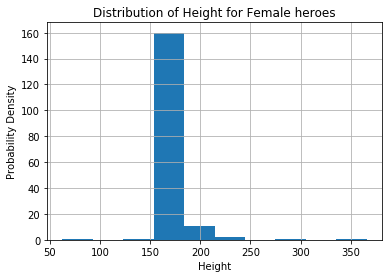

In [216]:
show_distplot(female_heroes_df,'Female','Height')

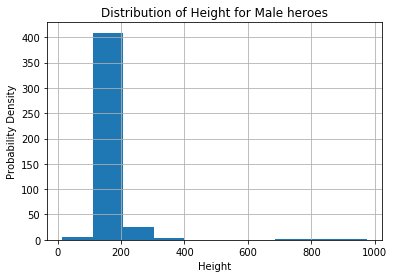

In [217]:
# Male Height
show_distplot(male_heroes_df,'Male','Height')

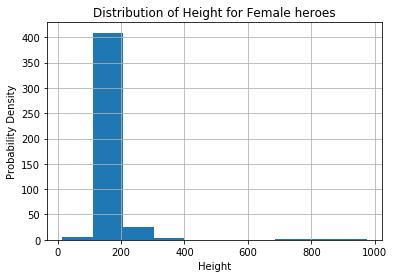

In [218]:
# Female Height
show_distplot(male_heroes_df,'Female','Height')

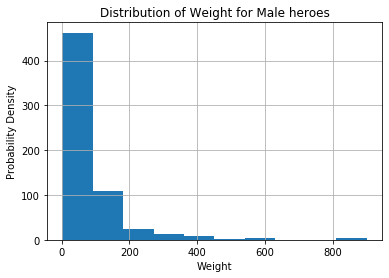

In [219]:
# Male Weight
show_distplot(df,'Male','Weight')

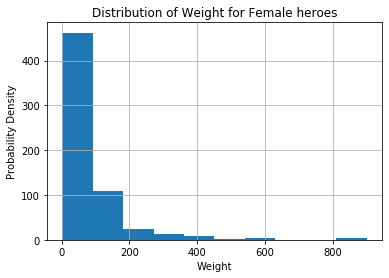

In [220]:
show_distplot(df,'Female','Weight')

In [221]:
import seaborn as sns
## our version
def plot_heroes(df, group_col, group_to_plot, plot_col):
    
    group_df = df.groupby(group_col).get_group(group_to_plot)
  
    fig,ax = plt.subplots()
    
    sns.distplot(group_df[plot_col],kde=False,ax=ax)
    
    ax.set_title(f"Grouped by {group_col}: {group_to_plot}")
    return fig,ax

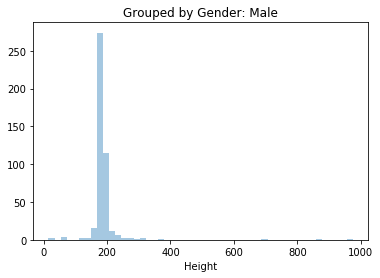

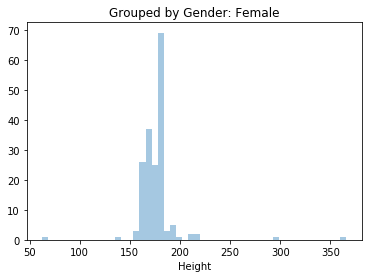

In [222]:
fig,ax = plot_heroes(df, 'Gender','Male','Height')
fig,ax = plot_heroes(df, 'Gender','Female','Height')

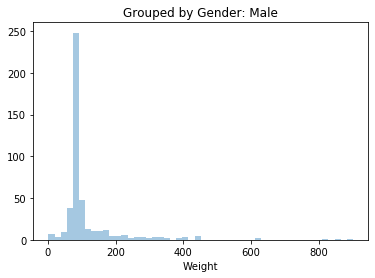

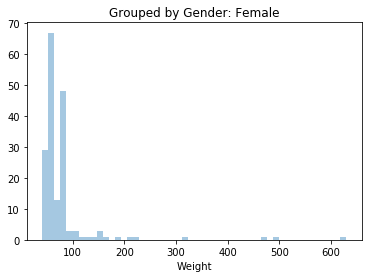

In [223]:
fig,ax = plot_heroes(df, 'Gender','Male','Weight')
fig,ax = plot_heroes(df, 'Gender','Female','Weight')

> Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



___

# ACTIVITY: Visualizing Super Heroes

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [224]:
power_cols = powers_df.drop(columns=['hero_names']).columns
power_cols

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)

In [225]:
power_counts = df[power_cols].sum(axis=0)
power_counts

Agility                  226
Accelerated Healing      171
Lantern Power Ring        11
Dimensional Awareness     22
Cold Resistance           47
                        ... 
Phoenix Force              1
Molecular Dissipation      1
Vision - Cryo              1
Omnipresent                1
Omniscient                 1
Length: 167, dtype: int64

In [226]:
top_10 = power_counts.sort_values(ascending=False).head(10)#.plot(kind='bar')
top_10

Super Strength         341
Stamina                271
Durability             242
Super Speed            236
Agility                226
Flight                 203
Accelerated Healing    171
Reflexes               156
Intelligence           148
Energy Blasts          141
dtype: int64

# Matplotlib.pyplot 

- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html
- Pyplot figures don't need to be created first. You can just call one of the plotting functions `plt.bar/plot/scatter/etc`
- Any `plt` commands entered in the same cell will happen on the same plot.

```python
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.hist(x)
plt.scatter(x,y)
plt.bar(x, height) #x= group/label, height = bar height/ y

```

- BUT if you want to specify figsize, you have to you create the figure first with `plt.figure(figsize=(W,H))` where width and height are numbers.

```python
fig = plt.figure(figsize=(10,5))
plt.plot(x,y)
```

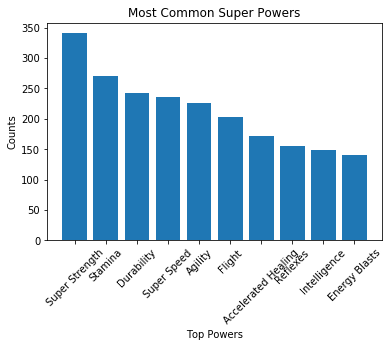

In [227]:
plt.bar(top_10.index,top_10.values)
plt.ylabel('Counts')
plt.xlabel('Top Powers')
plt.title('Most Common Super Powers')
plt.tick_params(axis='x',labelrotation=45)

## Matplotlib's Object-Oriented Interface
- Create new figures by using `fig,ax=plt.subplots()` to create a figure _first_
    - If do not specify `nrows` or `ncols` it produces one ax inside the figure.
    
    - If you create subplots by passing it more rows or columns, then ax becomes a *list* of the axes.
    `fig, axes = plt.subplots(ncols=2)`
    
- Plotting commands are then called directly by the `ax` as a method.
i.e. `ax.plot()`

- Adding text and styling is done via a different set of commands, which are also called directly by the `ax`, and start with `.set_`
- The command for setting the title changes from `plt.title` to `ax.set_title()`
- `ax.set_ylabel()`
- etc.

[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Top Powers'),
 Text(0.5, 1.0, 'Most Common Super Powers')]

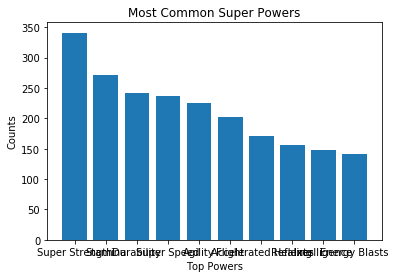

In [228]:
fig,ax = plt.subplots()
ax.bar(top_10.index,top_10.values)
ax.set(ylabel='Counts', xlabel='Top Powers',title = 'Most Common Super Powers')

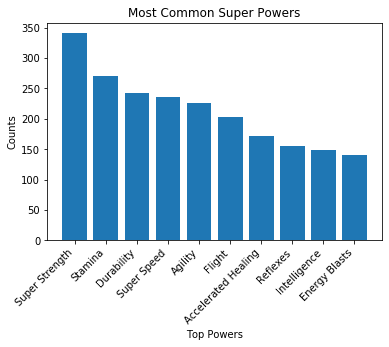

In [229]:
ax.set_xticklabels(ax.get_xticklabels(),fontdict=dict(rotation=45,
                  ha='right'))
fig

## Pandas & Seaborn

- *Matplotlib is the backbone of plotting in python.*<br> 
- Many packages ( `statsmodels`,`seaborn`,`pandas`,`plotly`) use a matplotlib backbone to make complex and aesthetically pleasing visuals.<br>
    - i.e. pandas `df.plot()/df.scatter()` are using matplotlib's .plot(), .scatter(), but wrapped 
    - i.e. seaborn's sns.regplot() is a matplotlib plt.scatter() and a plt.plot() line

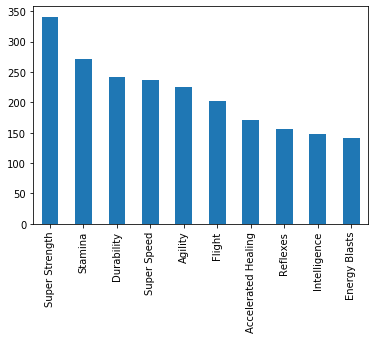

In [230]:
top_10.plot(kind='bar')

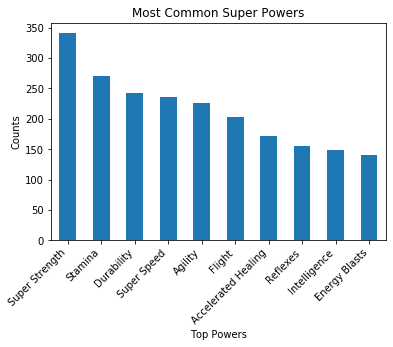

In [231]:
ax = top_10.plot(kind='bar')
ax.set(ylabel='Counts', xlabel='Top Powers',title = 'Most Common Super Powers');
ax.set_xticklabels(ax.get_xticklabels(),fontdict=dict(rotation=45,ha='right'));

### OOP Matplotlib + Pandas

[Text(0, 0.5, 'Power'),
 Text(0.5, 0, 'Counts'),
 Text(0.5, 1.0, 'Top 10 Most Common Powers')]

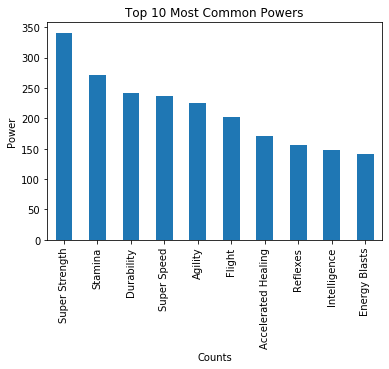

In [232]:
n = 10
ax = power_counts.sort_values(ascending=False).head(n).plot(kind='bar')
ax.set(xlabel='Counts',ylabel='Power',
       title=f'Top {n} Most Common Powers')

- We can customize the text properties for our labels using the `fontdict` parameter in our text/labeling functiopns 

    - font_dict is a dictionary with a keyword that specifies what property to change and a value for that property
    - [See this link for available properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html?highlight=text)

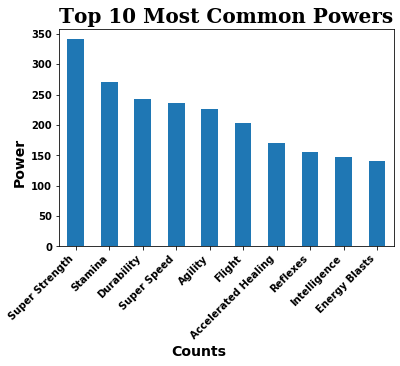

In [233]:
## Fixing and customizing fonts
xticklabel_fonts = dict(rotation=45,weight='bold',ha='right')
yticklabel_fonts = dict(weight='bold',ha='right')
title_fonts = dict(family='serif',weight='bold',size=20)
axlabels =  dict(weight='bold',ha='right',size=14)

ax.set_title(ax.get_title(),fontdict=title_fonts)
ax.set_xticklabels(ax.get_xticklabels(),fontdict=xticklabel_fonts)
ax.set_yticklabels(ax.get_yticklabels(),fontdict=yticklabel_fonts)
ax.set_xlabel(ax.get_xlabel(), fontdict=axlabels)
ax.set_ylabel(ax.get_ylabel(),fontdict = axlabels)
fig = ax.get_figure()
fig

In [234]:
def plot_top_n(value_counts,n = 10):
    
    ax = value_counts.sort_values(ascending=False).head(n).plot(kind='bar')
    ax.set(ylabel='Counts',xlabel='Power',
       title=f'Top {n} Most Common Powers')
    ## Fixing and customizing fonts
    xticklabel_fonts = dict(rotation=45,weight='bold',ha='right')
#     yticklabel_fonts = dict(rotation=0,weight='bold',ha='right')
    
    title_fonts = dict(family='serif',weight='bold',size=20)
    axlabels =  dict(weight='bold',ha='right',size=14)

    ax.set_title(ax.get_title(),fontdict=title_fonts)
    ax.set_xticklabels(ax.get_xticklabels(),fontdict=xticklabel_fonts)
#     ax.set_yticklabels(ax.get_yticklabels())#,fontdict=yticklabel_fonts)
    ax.set_xlabel(ax.get_xlabel(), fontdict=axlabels)
    ax.set_ylabel(ax.get_ylabel(),fontdict = axlabels)
    fig = ax.get_figure()
    return fig,ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a20d57588>)

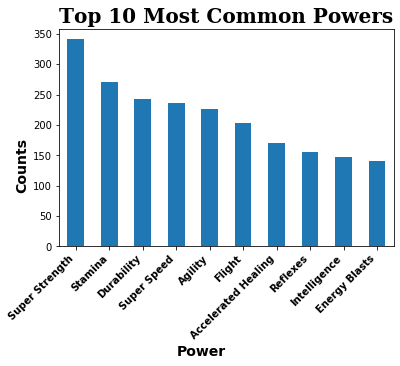

In [235]:
plot_top_n(power_counts)

In [236]:
marvel_counts = df.groupby('Publisher').get_group('Marvel Comics')[power_cols].sum(axis=0)
marvel_counts

Agility                  120
Accelerated Healing       93
Lantern Power Ring         0
Dimensional Awareness     15
Cold Resistance           24
                        ... 
Phoenix Force              1
Molecular Dissipation      0
Vision - Cryo              0
Omnipresent                1
Omniscient                 1
Length: 167, dtype: int64

In [237]:
dc_counts = df.groupby('Publisher').get_group('DC Comics')[power_cols].sum(axis=0)
dc_counts

Agility                  68
Accelerated Healing      50
Lantern Power Ring       11
Dimensional Awareness     7
Cold Resistance          14
                         ..
Phoenix Force             0
Molecular Dissipation     1
Vision - Cryo             1
Omnipresent               0
Omniscient                0
Length: 167, dtype: int64

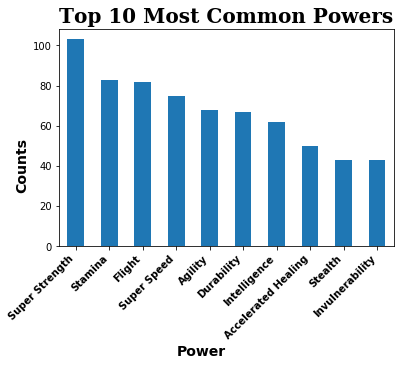

In [238]:
fig,ax = plot_top_n(dc_counts)


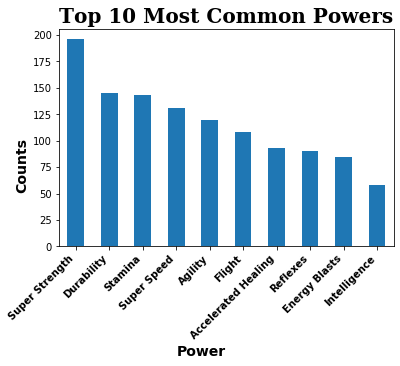

In [239]:
fig,ax = plot_top_n(marvel_counts)


> Analyze the results you found above to answer the following question:

> How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

> Write your answer below this line:
____________________________________________________________________________________________________________________________

## Matplotlib Styles

You can specify a style sheet for pandas, which will change the default visual style for all plots. 
- **[Visit the gallery for a preview of the styles available.](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)**


```python
import matplotlib.pyplot as plt
plt.style.use('style-name')
```

Use a context` block to apply a style to that figure only:
```python
with plt.style.context('style-name'):
    plt.plot()
```

In [243]:
style_names = plt.style.available

print("[i] Available matplotlib styles:")
[print('\t',x) for x in style_names];

[i] Available matplotlib styles:
	 _classic_test_patch
	 seaborn-dark
	 seaborn-darkgrid
	 seaborn-ticks
	 fivethirtyeight
	 seaborn-whitegrid
	 classic
	 _classic_test
	 fast
	 seaborn-talk
	 seaborn-dark-palette
	 seaborn-bright
	 seaborn-pastel
	 grayscale
	 seaborn-notebook
	 ggplot
	 seaborn-colorblind
	 seaborn-muted
	 seaborn
	 Solarize_Light2
	 seaborn-paper
	 bmh
	 tableau-colorblind10
	 seaborn-white
	 dark_background
	 seaborn-poster
	 seaborn-deep


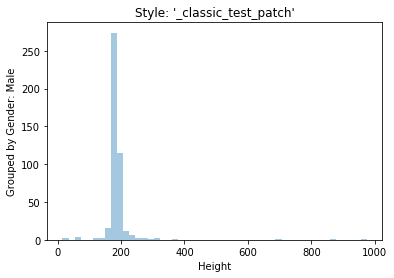

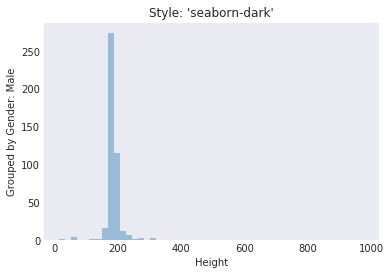

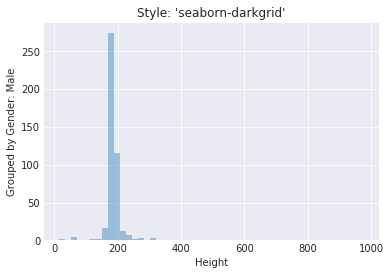

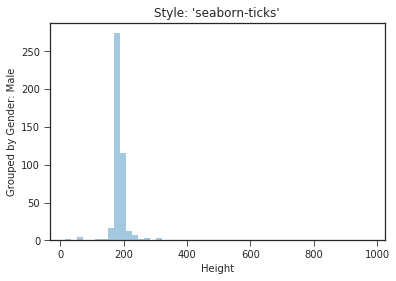

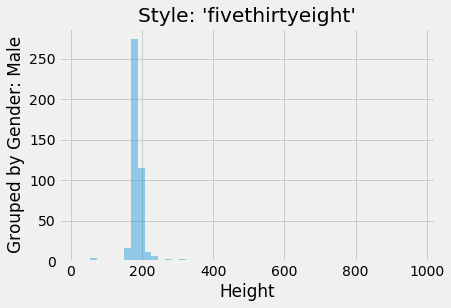

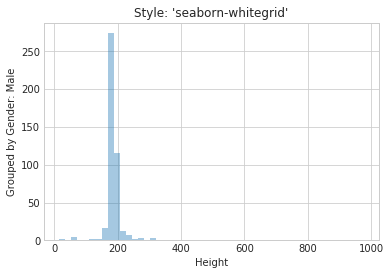

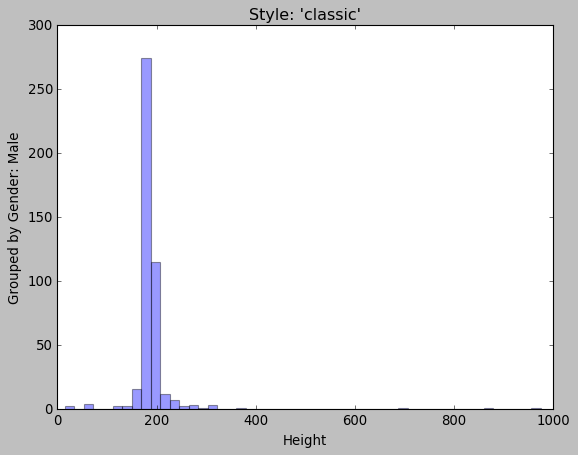

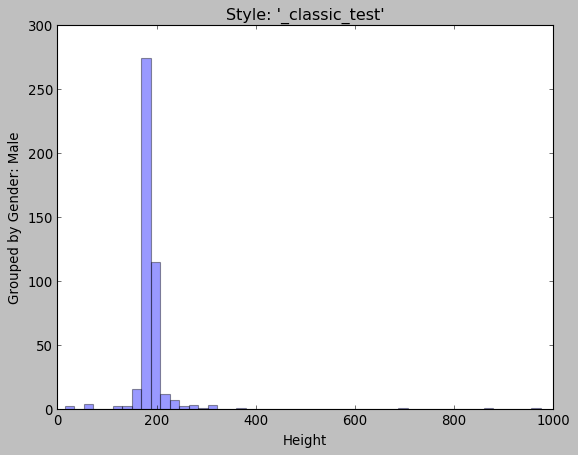

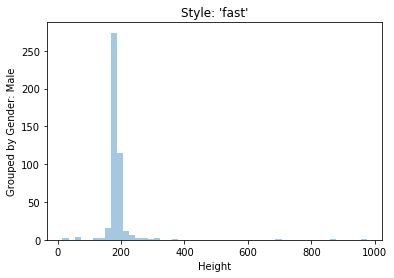

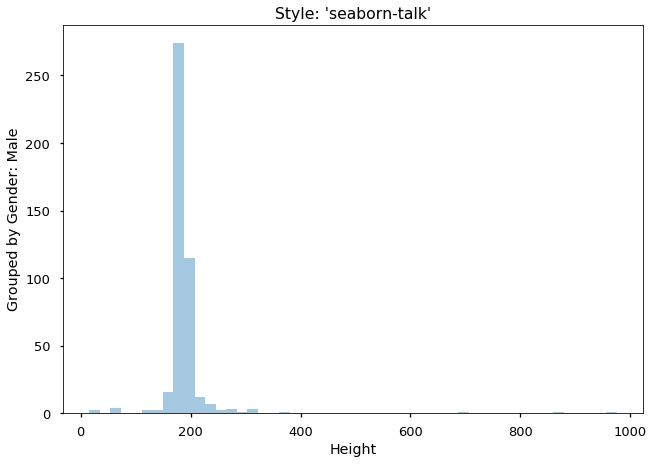

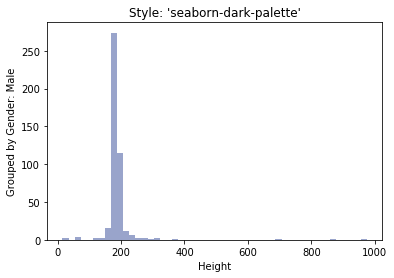

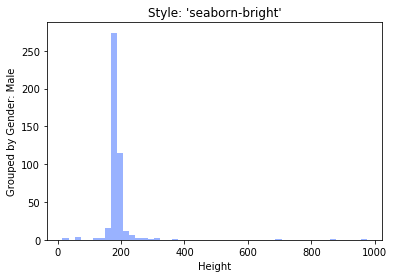

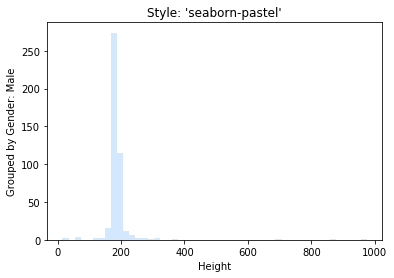

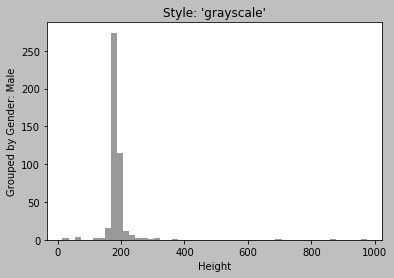

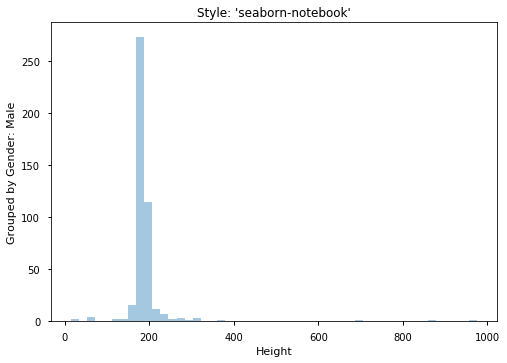

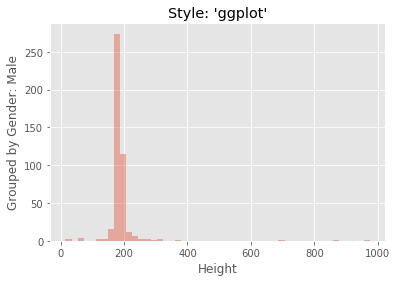

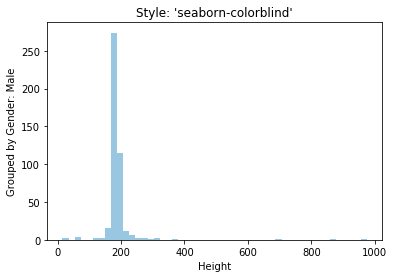

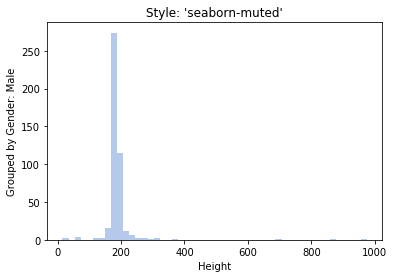

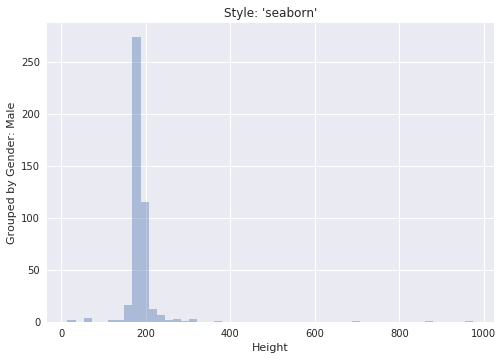

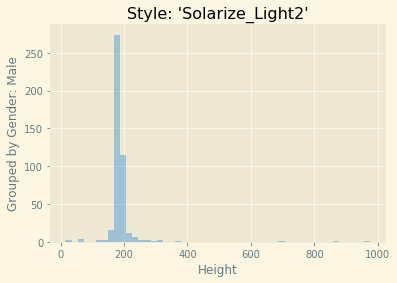

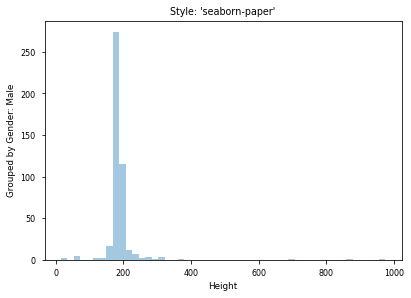

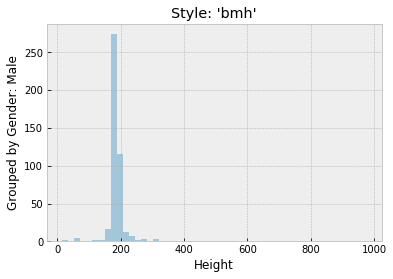

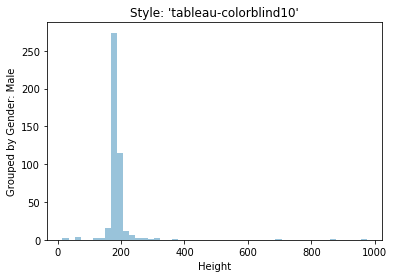

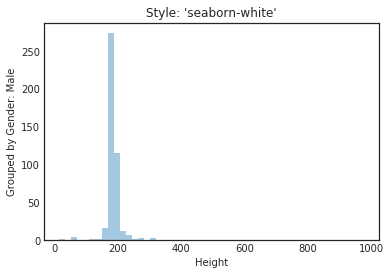

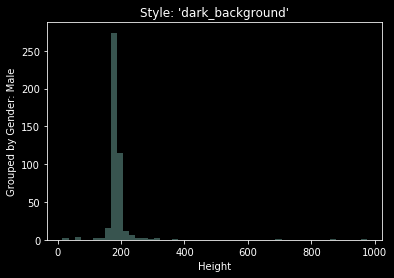

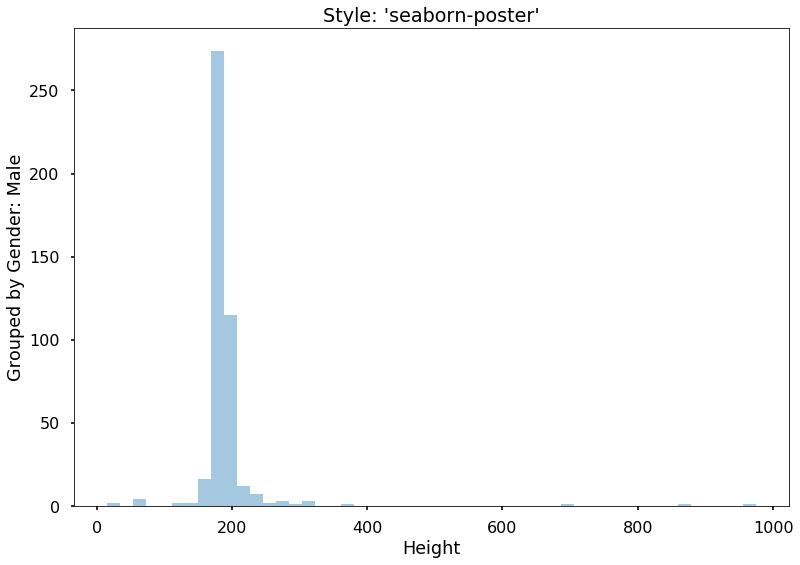

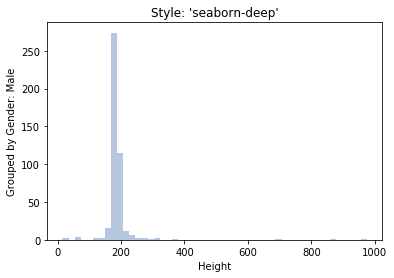

In [249]:
# Loop through style names
for style in style_names:
    
    # Use context manager to apply style to ONLY this figure
    with plt.style.context(style):
        fig,ax = plot_heroes(df,'Gender','Male','Height')
        ax.set_ylabel(ax.get_title())
        ax.set_title(f"Style: '{style}'")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a232e07b8>)

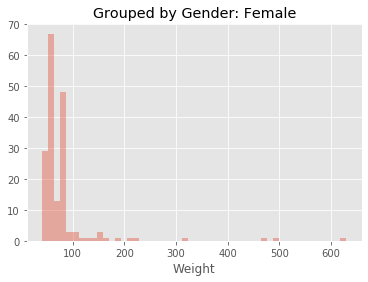

In [250]:
# Female Weight
plt.style.use('ggplot')
plot_heroes(df,'Gender','Female','Weight')

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data